# Simulationsbeispiel


Wir wollen hier den Zentralen Grenzwertsatz noch an einem Beispiel veranschaulichen. Dabei untersuchen wir das Verhalten von $ \overline{X}_{n} $. Wir haben eine Ergebnismenge
$
\Omega
=\{0,10,11\}
$
aus der wir eine Zahl ziehen. Die Zufallsvariable $ X $ gibt den Wert der gezogenen Zahl an. 

Zudem gilt
$
P(X=0)
=P(X=10)
=P(X=11)
=\dfrac{1}{3}
$

Damit gilt für den Erwartungswert von $ X $: 
$
\textrm{E}(X)
=\dfrac{1}{3}\cdot 0+\dfrac{1}{3}\cdot 10+\dfrac{1}{3}\cdot 11
=7
$

In [1]:
import numpy as np
werte = np.array([0,10,11])
ew = np.sum(werte*1/3)
ew
print(ew)

7.0


für die Varianz gilt dann 
$
\textrm{Var}(X)
=\dfrac{1}{3}\cdot (0-7)^{2}+\dfrac{1}{3}\cdot (10-7)^{2}+\dfrac{1}{3}\cdot (11-7)^{2}
=24.667
$

In [2]:
import numpy as np
werte = np.array([0,10,11])
ew = np.sum(werte*1/3)
var_X = np.sum((werte-ew)**2*1/3)
var_X
print(var_X)

24.666666666666664


mit der Standardabweichung

In [3]:
import numpy as np
werte = np.array([0,10,11])
ew = np.sum(werte*1/3)
var_X = np.sum((werte-ew)**2*1/3)
sd_X = np.sqrt(var_X)
print(sd_X)

4.96655480858378


Wir beginnen mit einem Versuch (10 Ziehungen)

In [57]:
import numpy as np
werte = np.array([0,10,11])
# np.random.seed(100)
sim = np.random.choice(werte, size=10, replace = True)
sim
print(sim)

[11 11 10  0  0  0  0 11  0 10]


Diese Daten stellen wir noch als Histogramm dar

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 4.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Patch objects>)

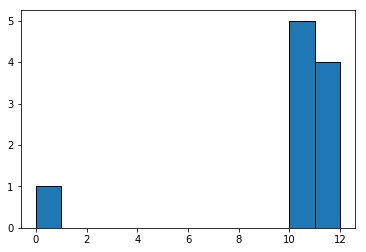

In [77]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
werte = np.array([0,10,11])
# np.random.seed(100)
sim = np.random.choice(werte, size=10, replace = True)
plt.hist(sim, bins=range(0,13,1), edgecolor="black")

Offensichtlich haben wir es hier mit keiner Normalverteilung zu tun. In diesem Versuch kamen nur die Zahlen 0, 10, 11 vor. Nun können wir zwei solche Versuche (je 10 Ziehungen) hintereinander ausführen und den Durchschnitt aus den beiden Versuchen berechnen.

[11  0 11  0 11 11  0 10  0 11]
[11  0 11 11 11 11 10 10 11 10]
[11.   0.  11.   5.5 11.  11.   5.  10.   5.5 10.5]


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 4.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5]),
 <a list of 23 Patch objects>)

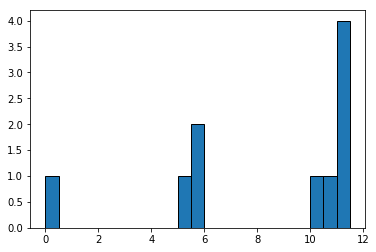

In [78]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
werte = np.array([0,10,11])
np.random.seed(13)
sim_1 = np.random.choice(werte,size=10, replace = True)
sim_1
print(sim_1)

sim_2 = np.random.choice(werte,size=10, replace = True)
sim_2
print(sim_2)

sim_mean_2 = (sim_1+sim_2)/2
sim_mean_2
print(sim_mean_2)
plt.hist(sim_mean_2, bins=np.linspace(0, 11.5, 24), edgecolor="black")

Neben den Zahlen $0, 10, 11$ können nun auch noch die Zahlen $5, 5.5$ und $10.5$ vorkommen.

Wir wollen nun 16, 64, 256 und 1024 solche Versuche durchf\"uhren, aber mit jeweils 1000 Ziehungen.

Text(0.5,1,'n=200')

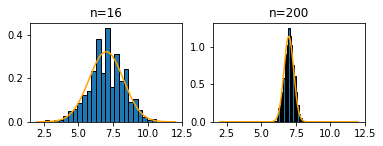

In [79]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline  


plt.subplot(2,2,1)

n = 16

# es werden 1000*n zufaellige Zahlen aus werte gezogen 
sim = np.random.choice(werte,1000*n, replace = True)

# reshape: Vektor wird in eine n x 1000-Matrix umgewandelt (1000 Spalten)
sim = np.reshape(sim, (n,1000))

# Mittelwert aller Spalten (axis=0)
sim_mean = np.mean(sim, axis=0)

# Festlegung der x-Werte: 500 Werte zwischen 2 und 12
x = np.linspace(2,12,500)

# Berechung der zugehoerigen Funktionswerte
y = norm.pdf(x, loc=7, scale=sd_X/np.sqrt(n))

plt.plot(x,y,color="orange")

#Normierung, dass die Flaeche des Histogrammes 1 ist
plt.hist(sim_mean, edgecolor="black", bins="auto", normed=True)
plt.title("n=16")

plt.subplot(2,2,2)

n = 200

# es werden 1000*n zufaellige Zahlen aus werte gezogen 
sim = np.random.choice(werte,1000*n, replace = True)

# reshape: Vektor wird in eine n x 1000-Matrix umgewandelt (1000 Spalten)
sim = np.reshape(sim, (n,1000))

# Mittelwert aller Spalten (axis=0)
sim_mean = np.mean(sim, axis=0)

# Festlegung der x-Werte: 500 Werte zwischen 2 und 12
x = np.linspace(2,12,500)

# Berechung der zugehoerigen Funktionswerte
y = norm.pdf(x, loc=7, scale=sd_X/np.sqrt(n))

plt.plot(x,y,color="orange")

#Normierung, dass die Flaeche des Histogrammes 1 ist
plt.hist(sim_mean, edgecolor="black", bins="auto", normed=True)
plt.title("n=200")










Was (bei genauerem Hinschauen) auffällt, ist :

- die Werte häufen sich um den Erwartungswert 7
- die Standardabweichung des Mittelwertes (also der Standardfehler) wird kleiner, und zwar halbiert sie sich etwa beim Vervierfachen der Anzahl Versuche
- die Histogramme scheinen einer Normalverteilung zu folgen
